In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcd

%matplotlib inline

Import the dataset

In [500]:
data = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Projects\\4. Segmentation of Credit Card Customers\\CC_GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [502]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [505]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data[data.columns.difference(['CUST_ID'])].apply(lambda x: var_summary(x)).T
num_summary.to_csv('data_summary.csv')

Generate Profiling Report

In [5]:
profile_report = pandas_profiling.ProfileReport(data)
profile_report.to_file(outputfile='profile.html')

CUST_ID not contributing for the model. So, dropping the variable.

In [6]:
data.drop(columns=['CUST_ID'], axis=1, inplace=True)

### KPI's

In [7]:
def purchaseType(x):
    if x['ONEOFF_PURCHASES'] == 0 and x['INSTALLMENTS_PURCHASES'] == 0:
        return "None"
    elif x['ONEOFF_PURCHASES'] > 0 and x['INSTALLMENTS_PURCHASES'] == 0:
        return "One_Of"
    elif x['ONEOFF_PURCHASES'] == 0 and x['INSTALLMENTS_PURCHASES'] > 0:
        return "Installment_Purchases"
    elif x['ONEOFF_PURCHASES'] >0 and x['INSTALLMENTS_PURCHASES'] >0:
        return "Both"
    else:
        return -1

In [8]:
# Feature Engineering
data['Monthly_avg_purchase'] = data['PURCHASES'] / data['TENURE']
data['Monthly_cash_advance'] = data['CASH_ADVANCE'] / data['TENURE']
data['limit_usage'] = data['BALANCE'] / data['CREDIT_LIMIT']

arr = []
for row in data.iterrows():
    x = purchaseType(row[1])
    arr.append(x)
data['purchase_type'] = pd.Series(arr)

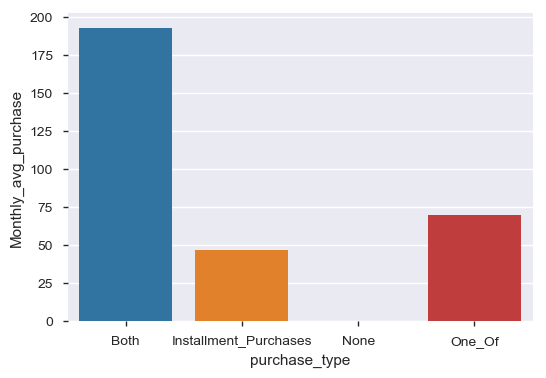

In [468]:
df1 = data.groupby(by=['purchase_type'])[['Monthly_avg_purchase']].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(df1['purchase_type'], df1['Monthly_avg_purchase'])
plt.show()

The customers doing both one-off and installment purchases tend to spend more.

### Data Exploratory Analysis

In [9]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,purchase_type
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,Installment_Purchases
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,None
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,One_Of
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,One_Of
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,One_Of
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1.005460,Installment_Purchases
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000,0.046464,Both
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,12,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000,0.792892,Installment_Purchases
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,5,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000,0.144989,Both
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,3,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000,0.013839,One_Of


Seperating numerical and categorical variables

In [10]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage']
['purchase_type']


In [11]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data[numeric_var_names].apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


Created seperate dataframes for numeric and categoric data.

In [12]:
data_num = data[numeric_var_names]
data_cat = data[cat_var_names]

### Oulier Treatment

In [13]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

### Missing value Treatment

In [14]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x
def Missing_imputation_cat(x):
    x = x.fillna(x.mode())
    return x

data_num = data_num.apply(lambda x: Missing_imputation(x))
data_cat = data_cat.apply(lambda x: Missing_imputation_cat(x))

In [15]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

Correlation between variables.

In [16]:
data_num.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage
BALANCE,1.000000,0.370254,0.124336,0.138493,0.040367,0.565401,-0.102891,0.070789,-0.089514,0.489843,0.487851,0.086826,0.510543,0.347819,0.774570,-0.359881,0.075801,0.118802,0.543382,0.619571
BALANCE_FREQUENCY,0.370254,1.000000,0.192937,0.153188,0.170524,0.116485,0.237081,0.204411,0.184918,0.200011,0.178447,0.240389,0.105576,0.124358,0.291212,-0.111917,0.133089,0.187511,0.103147,0.456831
PURCHASES,0.124336,0.192937,1.000000,0.865282,0.710001,-0.137265,0.589131,0.658719,0.461632,-0.187429,-0.149599,0.802715,0.348476,0.515077,0.110925,0.215231,0.121018,0.994094,-0.143318,-0.113876
ONEOFF_PURCHASES,0.138493,0.153188,0.865282,1.000000,0.319737,-0.092469,0.394927,0.764991,0.168362,-0.121483,-0.096036,0.638903,0.336708,0.456999,0.064326,0.127898,0.087760,0.863161,-0.097293,-0.078613
INSTALLMENTS_PURCHASES,0.040367,0.170524,0.710001,0.319737,1.000000,-0.147078,0.639240,0.251237,0.729578,-0.200741,-0.162689,0.714152,0.210151,0.338280,0.107588,0.238894,0.116144,0.702986,-0.152415,-0.122431
CASH_ADVANCE,0.565401,0.116485,-0.137265,-0.092469,-0.147078,1.000000,-0.286882,-0.122090,-0.238361,0.739399,0.766841,-0.163455,0.307893,0.375003,0.398422,-0.211834,-0.097117,-0.134462,0.989460,0.303500
PURCHASES_FREQUENCY,-0.102891,0.237081,0.589131,0.394927,0.639240,-0.286882,1.000000,0.501343,0.862934,-0.333006,-0.282215,0.742413,0.115903,0.146167,-0.022452,0.305802,0.069300,0.589490,-0.288386,-0.227169
ONEOFF_PURCHASES_FREQUENCY,0.070789,0.204411,0.658719,0.764991,0.251237,-0.122090,0.501343,1.000000,0.142329,-0.125492,-0.106483,0.638118,0.298759,0.316838,0.003956,0.157531,0.087045,0.656923,-0.124294,-0.096461
PURCHASES_INSTALLMENTS_FREQUENCY,-0.089514,0.184918,0.461632,0.168362,0.729578,-0.238361,0.862934,0.142329,1.000000,-0.282139,-0.237355,0.667528,0.054047,0.110787,0.007014,0.250087,0.079282,0.457713,-0.240906,-0.185014
CASH_ADVANCE_FREQUENCY,0.489843,0.200011,-0.187429,-0.121483,-0.200741,0.739399,-0.333006,-0.125492,-0.282139,1.000000,0.914309,-0.193915,0.134653,0.214712,0.331363,-0.267346,-0.127201,-0.182080,0.740138,0.422815


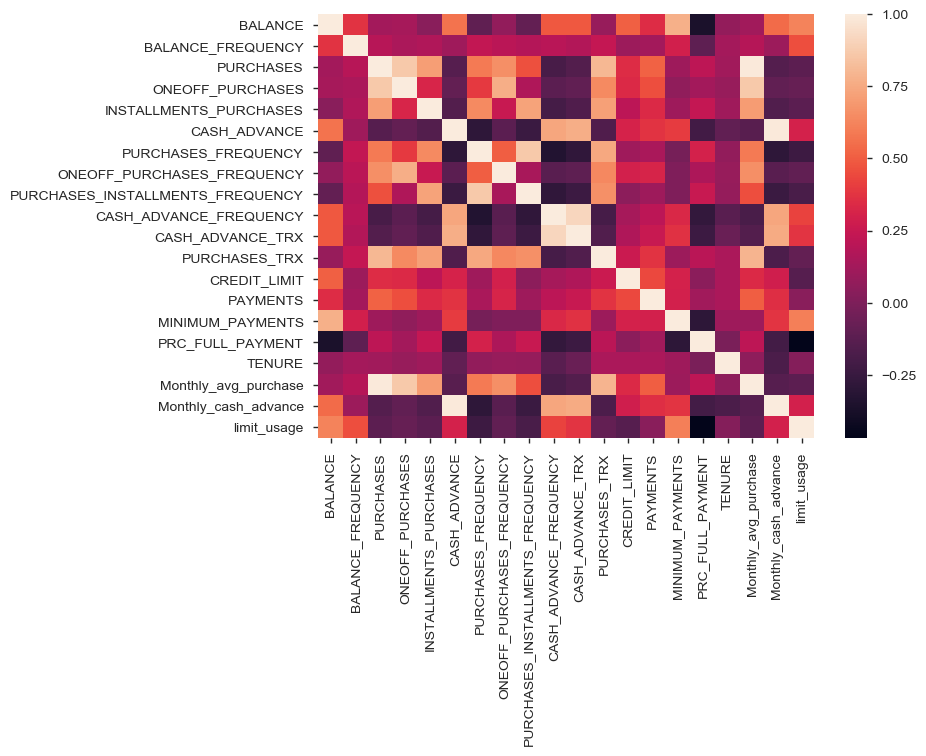

In [17]:
sns.heatmap(data_num.corr())
plt.show()

### Dummy variable Creation

In [18]:
def createDummyVariables(df,col):
    df_dummy = pd.get_dummies(data=df[col],drop_first=True,prefix=col)
    df = pd.concat([df,df_dummy],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [19]:
data_cat_new = data_cat
for feature in data_cat_new.columns:
    data_cat_new = createDummyVariables(data_cat_new,feature)
data_cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
purchase_type_Installment_Purchases    8950 non-null uint8
purchase_type_None                     8950 non-null uint8
purchase_type_One_Of                   8950 non-null uint8
dtypes: uint8(3)
memory usage: 26.3 KB


In [20]:
data_final = pd.concat([data_num,data_cat_new], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
BALANCE                                8950 non-null float64
BALANCE_FREQUENCY                      8950 non-null float64
PURCHASES                              8950 non-null float64
ONEOFF_PURCHASES                       8950 non-null float64
INSTALLMENTS_PURCHASES                 8950 non-null float64
CASH_ADVANCE                           8950 non-null float64
PURCHASES_FREQUENCY                    8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY             8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY       8950 non-null float64
CASH_ADVANCE_FREQUENCY                 8950 non-null float64
CASH_ADVANCE_TRX                       8950 non-null float64
PURCHASES_TRX                          8950 non-null float64
CREDIT_LIMIT                           8950 non-null float64
PAYMENTS                               8950 non-null float64
MINIMUM_PAYMENTS                       

### Standardizing the variables

In [22]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data_final)

In [23]:
data_scaled = pd.DataFrame(data_scaled,columns=[data_final.columns])
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,purchase_type_Installment_Purchases,purchase_type_None,purchase_type_One_Of
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,...,-0.800356,-0.686097,-0.525551,0.378995,-0.672440,-0.600126,-0.990006,1.720516,-0.543690,-0.514625
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,...,1.643245,0.613947,0.234227,0.378995,-0.757187,2.868023,0.212144,-0.581221,1.839282,-0.514625
2,0.617437,0.534496,-0.046095,0.435900,-0.675642,-0.605707,1.269843,2.673451,-0.916995,-0.722502,...,-0.537116,-0.006307,-0.525551,0.378995,-0.070357,-0.600126,-0.148012,-0.581221,-0.543690,1.943162
3,0.126875,-1.130304,0.613899,1.408742,-0.675642,-0.453170,-1.014125,-0.399319,-0.916995,-0.250789,...,-0.870392,-0.445226,-0.525551,0.378995,0.574420,-0.460364,-0.466773,-0.581221,-0.543690,1.943162
4,-0.375812,0.534496,-0.734587,-0.578948,-0.675642,-0.605707,-1.014125,-0.399319,-0.916995,-0.722502,...,-0.501872,-0.539371,-0.525551,0.378995,-0.742974,-0.600126,0.858340,-0.581221,-0.543690,1.943162


### Factor Analysis

In [25]:
fa = FactorAnalysis(random_state=123)
transformer = fa.fit(data_scaled)
transformer

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=123,
        svd_method='randomized', tol=0.01)

In [26]:
factor_df = pd.DataFrame(transformer.components_, columns=data_scaled.columns)
factor_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,purchase_type_Installment_Purchases,purchase_type_None,purchase_type_One_Of
0,-0.072980,0.165762,0.889372,0.729447,0.735785,-0.371763,0.788969,0.653427,0.662373,-0.418559,...,0.348368,-0.028113,0.320650,0.144018,0.884650,-0.377170,-0.258110,0.026972,-0.581571,-0.113251
1,0.764846,0.340140,0.281356,0.308206,0.105953,0.775709,-0.083206,0.219001,-0.108725,0.706680,...,0.563028,0.603465,-0.248410,0.003307,0.279572,0.763649,0.473396,-0.390073,0.227122,-0.020107
2,0.088749,0.149199,-0.145319,-0.436037,0.366044,0.142465,0.360214,-0.397162,0.608487,0.100758,...,-0.067524,0.179700,0.045857,-0.006935,-0.147204,0.140140,0.082689,0.588453,-0.087731,-0.548904
3,-0.353070,-0.373287,0.023927,0.016049,0.025500,0.263085,0.013900,0.002030,0.013365,0.134477,...,0.185519,-0.439245,0.390328,-0.196322,0.033389,0.279278,-0.583588,0.062598,-0.006234,-0.042563
4,0.046335,-0.150474,0.100350,-0.022202,0.194755,-0.037800,-0.249908,-0.255692,-0.049718,-0.122286,...,0.198567,0.059169,0.052802,0.104121,0.088699,-0.047544,-0.043628,-0.022645,0.379811,-0.344309
5,0.197945,-0.184238,-0.036953,-0.030097,-0.045308,0.071052,0.017886,-0.035350,-0.028695,-0.199597,...,0.128921,0.213085,0.044188,0.144184,-0.044846,0.053261,-0.166486,0.187750,-0.272248,0.235708
6,-0.028989,-0.167128,0.076423,0.034805,0.065806,0.005129,-0.057471,-0.148316,-0.025350,0.015476,...,-0.009814,0.058212,-0.097402,-0.241772,0.096080,0.025464,0.089084,0.146655,-0.139513,0.146155
7,0.045902,-0.039024,-0.012701,0.017860,-0.037813,0.035628,0.028016,0.042561,0.017614,-0.068366,...,-0.105826,-0.002111,-0.070376,-0.264091,0.002795,0.058767,-0.010462,-0.035274,0.061195,-0.083886
8,-0.001125,0.086296,-0.000342,0.013055,-0.030601,0.009160,0.011326,0.009074,-0.014006,-0.023723,...,0.050493,0.017207,0.142825,-0.050827,0.003751,0.012662,0.039547,0.041550,0.016253,-0.005638
9,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000


In [255]:
fa = FactorAnalysis(random_state=123)
transformer = fa.fit(data_scaled)
transformer

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=123,
        svd_method='randomized', tol=0.01)

In [270]:
factor_df = pd.DataFrame(transformer.components_, columns=data_scaled.columns)
factor_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,purchase_type_Installment_Purchases,purchase_type_None,purchase_type_One_Of
0,-0.072980,0.165762,0.889372,0.729447,0.735785,-0.371763,0.788969,0.653427,0.662373,-0.418559,...,0.348368,-0.028113,0.320650,0.144018,0.884650,-0.377170,-0.258110,0.026972,-0.581571,-0.113251
1,0.764846,0.340140,0.281356,0.308206,0.105953,0.775709,-0.083206,0.219001,-0.108725,0.706680,...,0.563028,0.603465,-0.248410,0.003307,0.279572,0.763649,0.473396,-0.390073,0.227122,-0.020107
2,0.088749,0.149199,-0.145319,-0.436037,0.366044,0.142465,0.360214,-0.397162,0.608487,0.100758,...,-0.067524,0.179700,0.045857,-0.006935,-0.147204,0.140140,0.082689,0.588453,-0.087731,-0.548904
3,-0.353070,-0.373287,0.023927,0.016049,0.025500,0.263085,0.013900,0.002030,0.013365,0.134477,...,0.185519,-0.439245,0.390328,-0.196322,0.033389,0.279278,-0.583588,0.062598,-0.006234,-0.042563
4,0.046335,-0.150474,0.100350,-0.022202,0.194755,-0.037800,-0.249908,-0.255692,-0.049718,-0.122286,...,0.198567,0.059169,0.052802,0.104121,0.088699,-0.047544,-0.043628,-0.022645,0.379811,-0.344309
5,0.197945,-0.184238,-0.036953,-0.030097,-0.045308,0.071052,0.017886,-0.035350,-0.028695,-0.199597,...,0.128921,0.213085,0.044188,0.144184,-0.044846,0.053261,-0.166486,0.187750,-0.272248,0.235708
6,-0.028989,-0.167128,0.076423,0.034805,0.065806,0.005129,-0.057471,-0.148316,-0.025350,0.015476,...,-0.009814,0.058212,-0.097402,-0.241772,0.096080,0.025464,0.089084,0.146655,-0.139513,0.146155
7,0.045902,-0.039024,-0.012701,0.017860,-0.037813,0.035628,0.028016,0.042561,0.017614,-0.068366,...,-0.105826,-0.002111,-0.070376,-0.264091,0.002795,0.058767,-0.010462,-0.035274,0.061195,-0.083886
8,-0.001125,0.086296,-0.000342,0.013055,-0.030601,0.009160,0.011326,0.009074,-0.014006,-0.023723,...,0.050493,0.017207,0.142825,-0.050827,0.003751,0.012662,0.039547,0.041550,0.016253,-0.005638
9,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000


In [271]:
factor_df = factor_df.iloc[0:9,:]
factor_df = factor_df.T
factor_df.columns = ['Factor_0',
                    'Factor_1',
                    'Factor_2',
                    'Factor_3',
                    'Factor_4',
                    'Factor_5',
                    'Factor_6',
                    'Factor_7',
                    'Factor_8'
                    ]
factor_df

,Factor_0,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8
BALANCE,-0.072980,0.764846,0.088749,-0.353070,0.046335,0.197945,-0.028989,0.045902,-0.001125
BALANCE_FREQUENCY,0.165762,0.340140,0.149199,-0.373287,-0.150474,-0.184238,-0.167128,-0.039024,0.086296
PURCHASES,0.889372,0.281356,-0.145319,0.023927,0.100350,-0.036953,0.076423,-0.012701,-0.000342
ONEOFF_PURCHASES,0.729447,0.308206,-0.436037,0.016049,-0.022202,-0.030097,0.034805,0.017860,0.013055
INSTALLMENTS_PURCHASES,0.735785,0.105953,0.366044,0.025500,0.194755,-0.045308,0.065806,-0.037813,-0.030601
CASH_ADVANCE,-0.371763,0.775709,0.142465,0.263085,-0.037800,0.071052,0.005129,0.035628,0.009160
PURCHASES_FREQUENCY,0.788969,-0.083206,0.360214,0.013900,-0.249908,0.017886,-0.057471,0.028016,0.011326
ONEOFF_PURCHASES_FREQUENCY,0.653427,0.219001,-0.397162,0.002030,-0.255692,-0.035350,-0.148316,0.042561,0.009074
PURCHASES_INSTALLMENTS_FREQUENCY,0.662373,-0.108725,0.608487,0.013365,-0.049718,-0.028695,-0.025350,0.017614,-0.014006
CASH_ADVANCE_FREQUENCY,-0.418559,0.706680,0.100758,0.134477,-0.122286,-0.199597,0.015476,-0.068366,-0.023723


In [272]:
factor_df.to_csv('factor1.csv')

Checking the top features in the intial factors.

In [29]:
factor_df.loc[0].sort_values(ascending=False).head(10)

PURCHASES                           0.966564
Monthly_avg_purchase                0.960818
ONEOFF_PURCHASES                    0.849209
PURCHASES_TRX                       0.834578
ONEOFF_PURCHASES_FREQUENCY          0.764201
INSTALLMENTS_PURCHASES              0.695574
PURCHASES_FREQUENCY                 0.674483
PURCHASES_INSTALLMENTS_FREQUENCY    0.494831
PAYMENTS                            0.414491
CREDIT_LIMIT                        0.295987
Name: 0, dtype: float64

In [30]:
factor_df.loc[1].sort_values(ascending=False).head(10)

CASH_ADVANCE              0.940785
Monthly_cash_advance      0.930517
CASH_ADVANCE_TRX          0.747577
CASH_ADVANCE_FREQUENCY    0.722813
BALANCE                   0.674185
PAYMENTS                  0.525417
MINIMUM_PAYMENTS          0.489578
CREDIT_LIMIT              0.419540
limit_usage               0.361964
purchase_type_None        0.243200
Name: 1, dtype: float64

In [31]:
factor_df.loc[2].sort_values(ascending=False).head(10)

INSTALLMENTS_PURCHASES                 0.567251
PURCHASES_INSTALLMENTS_FREQUENCY       0.469275
purchase_type_Installment_Purchases    0.436929
PURCHASES                              0.138649
Monthly_avg_purchase                   0.134004
MINIMUM_PAYMENTS                       0.117711
PURCHASES_FREQUENCY                    0.102039
PAYMENTS                               0.093867
PURCHASES_TRX                          0.081941
PRC_FULL_PAYMENT                       0.055677
Name: 2, dtype: float64

Features selected based on the factor analysis.

In [491]:
final_vars = ['PURCHASES',
             'Monthly_avg_purchase',
             'CASH_ADVANCE',
             'Monthly_cash_advance',
             'INSTALLMENTS_PURCHASES',
             'ONEOFF_PURCHASES',
             'purchase_type_Installment_Purchases',
             'CASH_ADVANCE_FREQUENCY',
             'ONEOFF_PURCHASES',
             'PURCHASES_TRX',
             'ONEOFF_PURCHASES_FREQUENCY'
             ];

final_vars = list(set(final_vars))

In [492]:
data_final.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'purchase_type_Installment_Purchases', 'purchase_type_None',
       'purchase_type_One_Of', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8'],
      dtype='object')

Final dataFrame for modelling.

In [493]:
data_model = data_scaled[final_vars]
data_model.head()

,CASH_ADVANCE,Monthly_cash_advance,ONEOFF_PURCHASES_FREQUENCY,Monthly_avg_purchase,PURCHASES_TRX,CASH_ADVANCE_FREQUENCY,purchase_type_Installment_Purchases,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES,PURCHASES
0,-0.605707,-0.600126,-0.678661,-0.672440,-0.680426,-0.722502,1.720516,-0.483999,-0.600394,-0.662389
1,2.838929,2.868023,-0.678661,-0.757187,-0.807798,0.692644,-0.581221,-0.675642,-0.600394,-0.749136
2,-0.605707,-0.600126,2.673451,-0.070357,-0.043563,-0.722502,-0.581221,-0.675642,0.435900,-0.046095
3,-0.453170,-0.460364,-0.399319,0.574420,-0.744112,-0.250789,-0.581221,-0.675642,1.408742,0.613899
4,-0.605707,-0.600126,-0.399319,-0.742974,-0.744112,-0.722502,-0.581221,-0.675642,-0.578948,-0.734587


### K Means Clustering

As we don't know the value of K, build the model for k in range(3,8)

In [418]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(data_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [419]:
km_3.labels_

array([2, 1, 2, ..., 2, 2, 0])

In [420]:
km_3.cluster_centers_

array([[-0.26831221, -0.28015185,  1.3898823 ,  1.80531427,  1.59847395,
        -0.31316041, -0.50478468,  1.20655449,  1.65162484,  1.82143828],
       [ 1.60917723,  1.61563365, -0.36978889, -0.49618694, -0.5344853 ,
         1.43800979, -0.36388394, -0.46382484, -0.38213355, -0.50329087],
       [-0.44849245, -0.44719289, -0.27937299, -0.35769205, -0.28562359,
        -0.37965573,  0.26423059, -0.19586401, -0.35070348, -0.36001366]])

In [421]:
km_4=KMeans(n_clusters=4,random_state=123).fit(data_model)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(data_model)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(data_model)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(data_model)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(data_model)
#km_5.labels_

In [422]:
data_final['cluster_3'] = km_3.labels_
data_final['cluster_4'] = km_4.labels_
data_final['cluster_5'] = km_5.labels_
data_final['cluster_6'] = km_6.labels_
data_final['cluster_7'] = km_7.labels_
data_final['cluster_8'] = km_8.labels_

The final DataFrame with the cluster labels.

In [423]:
data_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,limit_usage,purchase_type_Installment_Purchases,purchase_type_None,purchase_type_One_Of,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1,0,0,2,1,4,5,2,4
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.457495,0,1,0,1,2,2,0,6,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0,0,1,2,3,0,4,0,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0,0,1,2,3,0,4,0,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,0,0,1,2,3,3,1,3,0


### Metrics

#### 1. SC score

The SC value must be high.

In [494]:
# calculate SC for K=3 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(data_model)
    scores.append(metrics.silhouette_score(data_model, km.labels_))

In [506]:
scores

[0.37064928053497725,
 0.37616132141926906,
 0.3724905243195346,
 0.3843243572545827,
 0.3540830747767929,
 0.36024329063390526]

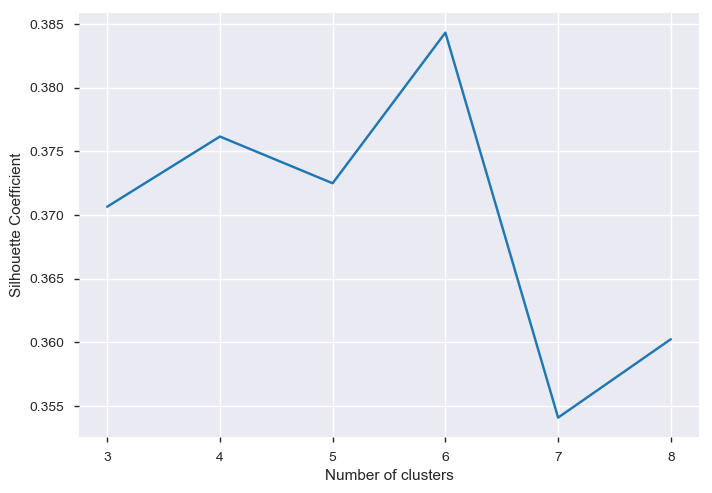

In [495]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

For K-6, SC value is the highest.

#### 2. Elbow Analysis

In [496]:
inertia = []
K = range(3,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_model)
    inertia.append(kmeanModel.inertia_)

In [507]:
inertia

[42020.5792960795,
 33298.22322448612,
 28403.813164509545,
 25254.269082777457,
 22894.348799242,
 20917.691773252416]

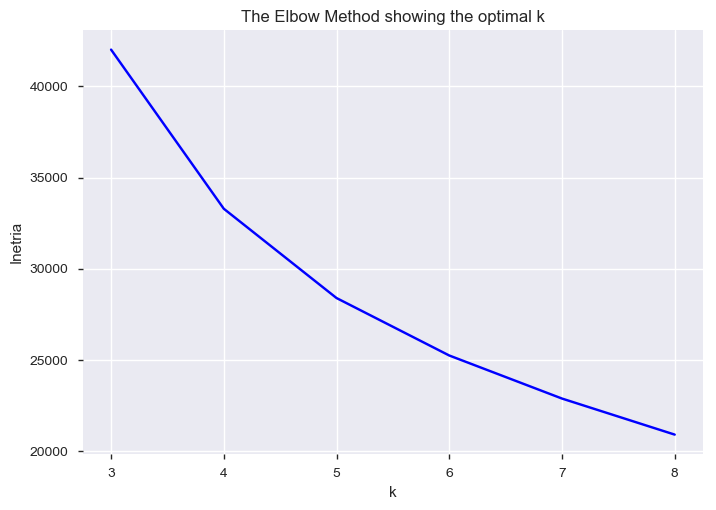

In [497]:
# Plot the elbow
plt.plot(K, inertia,'bx-')
plt.xlabel('k')
plt.ylabel('Inetria')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From K=6, there is not much drop in te Inetria value.

#### 3. Dendogram

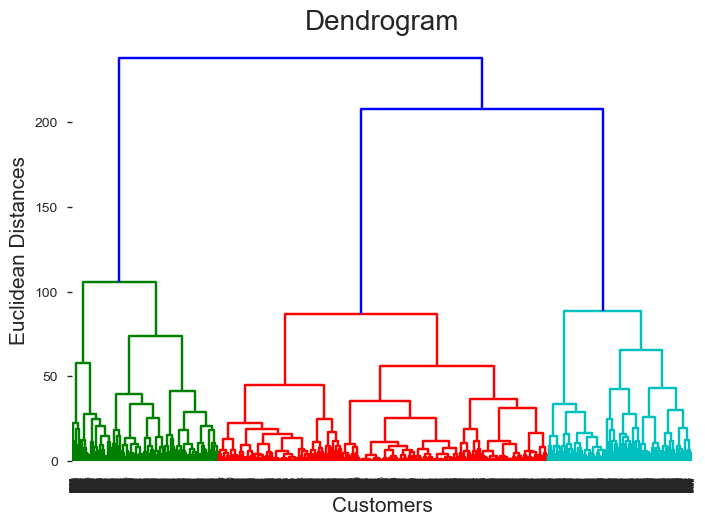

In [335]:
# Using the dendrogram to find the optimal number of clusters

dendrogram = hcd.dendrogram(hcd.linkage(data_model[final_vars], metric='euclidean', method = 'ward'))
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.xticks(rotation=90)
plt.ylabel('Euclidean Distances', size=15)
plt.show()

### PROFILING

In [476]:
data_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,limit_usage,purchase_type_Installment_Purchases,purchase_type_None,purchase_type_One_Of,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.040901,1,0,0,2,1,4,5,2,4
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.457495,0,1,0,1,2,2,0,6,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.332687,0,0,1,2,3,0,4,0,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.222223,0,0,1,2,3,0,4,0,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.681429,0,0,1,2,3,3,1,3,0


Distribution of customers in different clusters

In [425]:
pd.Series.sort_index(data_final.cluster_6.value_counts())

0    1426
1    2924
2     813
3     617
4    1245
5    1925
Name: cluster_6, dtype: int64

In [426]:
Profiling_output = pd.concat([data_final.apply(lambda x: x.mean()).T, data_final.groupby('cluster_6').apply(lambda x: x.mean()).T], axis=1)
Profiling_output

,0,0,1,2,3,4,5
BALANCE,1452.399593,3205.524460,1145.503376,2225.072486,1427.686070,1094.822164,532.741181
BALANCE_FREQUENCY,0.883252,0.925216,0.849845,0.974042,0.958967,0.923463,0.814291
PURCHASES,823.863022,284.238948,197.014077,3538.194047,2033.785730,1243.775020,370.016982
ONEOFF_PURCHASES,447.948730,176.671254,134.650215,2299.331235,344.694571,1029.283414,0.000000
INSTALLMENTS_PURCHASES,336.336040,106.103787,62.501036,1010.294001,1419.123173,213.144546,370.814312
CASH_ADVANCE,817.161146,3400.441047,447.003690,588.059351,356.572123,184.769057,119.163534
PURCHASES_FREQUENCY,0.490351,0.219295,0.189220,0.919365,0.916772,0.721534,0.681164
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.095036,0.086658,0.744236,0.183468,0.566124,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.136093,0.111731,0.695446,0.873517,0.318120,0.644429
CASH_ADVANCE_FREQUENCY,0.127637,0.396067,0.123566,0.084553,0.058151,0.047384,0.027347


In [427]:
size=pd.concat([pd.Series(data_final.cluster_3.size), pd.Series.sort_index(data_final.cluster_6.value_counts())])
size

0    8950
0    1426
1    2924
2     813
3     617
4    1245
5    1925
dtype: int64

In [428]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/8950, columns=['Seg_Pct'])
Seg_Pct.T

,0,0,1,2,3,4,5
Seg_Pct,1.0,0.15933,0.326704,0.090838,0.068939,0.139106,0.215084


In [429]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)

The final profiling output wih the mean value of all the features.

In [430]:
Profling_output_final.columns = ['Overall', 'KM6_1', 'KM6_2', 'KM6_3', 'KM6_1', 'KM6_2', 'KM6_3'
                                ]
Profling_output_final = Profling_output_final.iloc[0:25,]
Profling_output_final

,Overall,KM6_1,KM6_2,KM6_3,KM6_1,KM6_2,KM6_3
Seg_size,8950.000000,1426.000000,2924.000000,813.000000,617.000000,1245.000000,1925.000000
Seg_Pct,1.000000,0.159330,0.326704,0.090838,0.068939,0.139106,0.215084
BALANCE,1452.399593,3205.524460,1145.503376,2225.072486,1427.686070,1094.822164,532.741181
BALANCE_FREQUENCY,0.883252,0.925216,0.849845,0.974042,0.958967,0.923463,0.814291
PURCHASES,823.863022,284.238948,197.014077,3538.194047,2033.785730,1243.775020,370.016982
ONEOFF_PURCHASES,447.948730,176.671254,134.650215,2299.331235,344.694571,1029.283414,0.000000
INSTALLMENTS_PURCHASES,336.336040,106.103787,62.501036,1010.294001,1419.123173,213.144546,370.814312
CASH_ADVANCE,817.161146,3400.441047,447.003690,588.059351,356.572123,184.769057,119.163534
PURCHASES_FREQUENCY,0.490351,0.219295,0.189220,0.919365,0.916772,0.721534,0.681164
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.095036,0.086658,0.744236,0.183468,0.566124,0.000000


In [432]:
Profling_output_final.to_csv('Profiling_output1.csv')

### Analysis

In [508]:
size=pd.concat([pd.Series(data_final.cluster_3.size), pd.Series.sort_index(data_final.cluster_3.value_counts()), pd.Series.sort_index(data_final.cluster_4.value_counts()),
           pd.Series.sort_index(data_final.cluster_5.value_counts()), pd.Series.sort_index(data_final.cluster_6.value_counts()),
           pd.Series.sort_index(data_final.cluster_7.value_counts()), pd.Series.sort_index(data_final.cluster_8.value_counts())])

In [510]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data_final.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,1596,1810,5544,1468,2092,1556,3834,1547,983,...,1398,939,2183,704,893,586,1903,1378,1087,216


In [512]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0).T

,Seg_size,Seg_Pct
0,8950.0,1.000000
0,1596.0,0.178324
1,1810.0,0.202235
2,5544.0,0.619441
0,1468.0,0.164022
1,2092.0,0.233743
2,1556.0,0.173855
3,3834.0,0.428380
0,1547.0,0.172849
1,983.0,0.109832


### Implementation - new data